In [131]:
import pandas as pd
import re

In [137]:
nlp_df = pd.read_csv('./archive (2)/Combined_News_DJIA.csv')

# Initial Data Inspection

In [256]:
nlp_df.head(10)

,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
Date,,,,,,,,,,,,,,,,,,,,,
2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',"b""The commander of a Navy air reconnaissance s...",...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'S

In [4]:
#No null values

nlp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1989 non-null   object
 1   Label   1989 non-null   int64 
 2   Top1    1989 non-null   object
 3   Top2    1989 non-null   object
 4   Top3    1989 non-null   object
 5   Top4    1989 non-null   object
 6   Top5    1989 non-null   object
 7   Top6    1989 non-null   object
 8   Top7    1989 non-null   object
 9   Top8    1989 non-null   object
 10  Top9    1989 non-null   object
 11  Top10   1989 non-null   object
 12  Top11   1989 non-null   object
 13  Top12   1989 non-null   object
 14  Top13   1989 non-null   object
 15  Top14   1989 non-null   object
 16  Top15   1989 non-null   object
 17  Top16   1989 non-null   object
 18  Top17   1989 non-null   object
 19  Top18   1989 non-null   object
 20  Top19   1989 non-null   object
 21  Top20   1989 non-null   object
 22  Top21   1989 non-null   

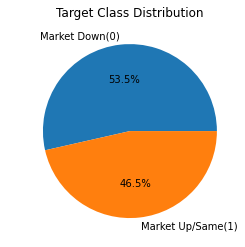

In [279]:
nlp_df['Label'].value_counts().plot.pie(autopct="%.1f%%", labels = ['Market Down(0)', 'Market Up/Same(1)']);
plt.title('Target Class Distribution');
plt.ylabel(' ');

In [5]:
train_df = nlp_df[nlp_df['Date'] < '2015-01-01']
test_df = nlp_df[nlp_df['Date'] > '2014-12-31']

In [6]:
train_df

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

## Clean Data/Pre-processing

In [7]:
#Cleaning data might be easier if all articles of same date are combined into one document

headline_list= []

for row in range(0,len(nlp_df)):
    headline_list.append(' '.join(str(txt) for txt in nlp_df.iloc[row, 2:26]))

In [186]:
headline_list[0]

'b"Georgia \'downs two Russian warplanes\' as countries move to brink of war" b\'BREAKING: Musharraf to be impeached.\' b\'Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)\' b\'Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire\' b"Afghan children raped with \'impunity,\' U.N. official says - this is sick, a three year old was raped and they do nothing" b\'150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets.\' b"Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SO\'s side" b"The \'enemy combatent\' trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it." b\'Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO]\' b\'Did the U.S. Prep Georgia for War with Russia?\'

In [9]:
# Clean data

import string
cleaned_headlines = []

for text in range(0, len(nlp_df)):
    cleaned_headlines.append(re.sub('b[''\'"]', '', headline_list[text])) # remove 'b' followed by characters
    cleaned_headlines[text] = re.sub("\'", '', cleaned_headlines[text]) # remove quotes and '\'
    cleaned_headlines[text] = re.sub('\w*\d\w*', ' ', cleaned_headlines[text])# remove digits
    cleaned_headlines[text] = cleaned_headlines[text].lower() # make all text lower case
    cleaned_headlines[text] = re.sub('[%s]'% re.escape(string.punctuation), ' ', cleaned_headlines[text]) #remove punctuation

In [10]:
cleaned_headlines[0]

'georgia downs two russian warplanes as countries move to brink of war  breaking  musharraf to be impeached  russia today  columns of troops roll into south ossetia  footage from fighting  youtube  russian tanks are moving towards the capital of south ossetia  which has reportedly been completely destroyed by georgian artillery fire afghan children raped with impunity  u n  official says   this is sick  a three year old was raped and they do nothing    russian tanks have entered south ossetia whilst georgia shoots down two russian jets  breaking  georgia invades south ossetia  russia warned it would intervene on sos side  the enemy combatent trials are nothing but a sham  salim haman has been sentenced to       years  but will be kept longer anyway just because they feel like it   georgian troops retreat from s  osettain capital  presumably leaving several hundred people killed   video  did the u s  prep georgia for war with russia  rice gives green light for israel to attack iran  say

In [11]:
len(cleaned_headlines)

1989

In [ ]:
# countvector=CountVectorizer(ngram_range=(2,2))
# headline_train_tfm =countvector.fit_transform(cleaned_headlines_train)

In [ ]:
# randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
# randomclassifier.fit(headline_train_tfm,train_df['Label'])

In [ ]:
# headline_test_tfm = countvector.transform(cleaned_headlines_test)
# predictions = randomclassifier.predict(headline_test_tfm)

In [ ]:
# from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
# matrix=confusion_matrix(test_df['Label'],predictions)
# print(matrix)
# score=accuracy_score(test_df['Label'],predictions)
# print(score)
# report=classification_report(test_df['Label'],predictions)
# print(report)

In [15]:
cleaned_headlines_train = cleaned_headlines[0:1611]
cleaned_headlines_test = cleaned_headlines[1611:]

In [16]:
len(cleaned_headlines_train), len(cleaned_headlines_test)

(1611, 378)

# Classification

# Model 1 - Baseline CountVectorizer

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

In [18]:
# Need to include stemmer within count vectorizer 

from nltk.stem import PorterStemmer, SnowballStemmer, LancasterStemmer
stemmer = SnowballStemmer('english')

In [19]:
# function for further pre-processing

def prep(word, stemmer=None):
    
    with open('../NBM_Unsupervised_Student/pairs/nlp_pipeline/stop_words_english.txt', 'r') as f:
        stopwords = [s.strip() for s in f.readlines()]
        
    if word.lower() in stopwords:
        return None
    
    elif stemmer is None:
        return word.lower()
    
    else:
        return stemmer.stem(word)

In [20]:
cvl = CountVectorizer(stop_words='english', preprocessor=prep)

X_train_cvl = cvl.fit_transform(cleaned_headlines_train)
X_test_cvl = cvl.transform(cleaned_headlines_test)
# pd.DataFrame(X_train_cvl.toarray(), columns=cvl.get_feature_names())

## Model 1 - Baseline CountVectorizer - Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=10000)

In [22]:
lr.fit(X_train_cvl, train_df['Label'])
y_pred_cv1 = lr.predict(X_test_cvl)

In [23]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def conf_matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, xticklabels=['predicted_negative', 'predicted_positive'], 
                yticklabels=['actual_negative', 'actual_positive'], annot=True,
                fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");

    true_neg, false_pos = cm[0]
    false_neg, true_pos = cm[1]

    accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
    precision = round((true_pos) / (true_pos + false_pos),3)
    recall = round((true_pos) / (true_pos + false_neg),3)
    f1 = round(2 * (precision * recall) / (precision + recall),3)
    print("Accuracy:",accuracy)
    print("Precision:",precision)
    print("Recall:",recall)
    print("F1:", f1)
    cm_results = [accuracy, precision, recall, f1]
    return cm_results

Accuracy: 0.426
Precision: 0.437
Recall: 0.453
F1: 0.445


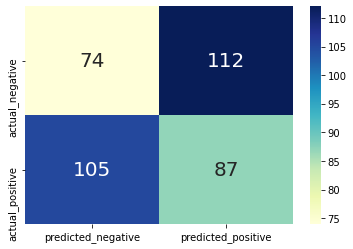

In [24]:
cm1 = conf_matrix(test_df['Label'], y_pred_cv1)

## Model 1 - Baseline CountVectorizer - Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rf=RandomForestClassifier(n_estimators=200,criterion='entropy')
rf.fit(cleaned_headlines_train, train_df['Label'])
y_pred_cv1_rf = rf.predict(X_test_cvl)

ValueError: could not convert string to float: 'georgia downs two russian warplanes as countries move to brink of war  breaking  musharraf to be impeached  russia today  columns of troops roll into south ossetia  footage from fighting  youtube  russian tanks are moving towards the capital of south ossetia  which has reportedly been completely destroyed by georgian artillery fire afghan children raped with impunity  u n  official says   this is sick  a three year old was raped and they do nothing    russian tanks have entered south ossetia whilst georgia shoots down two russian jets  breaking  georgia invades south ossetia  russia warned it would intervene on sos side  the enemy combatent trials are nothing but a sham  salim haman has been sentenced to       years  but will be kept longer anyway just because they feel like it   georgian troops retreat from s  osettain capital  presumably leaving several hundred people killed   video  did the u s  prep georgia for war with russia  rice gives green light for israel to attack iran  says u s  has no veto over israeli military ops announcing class action lawsuit on behalf of american public against the fbi so   russia and georgia are at war and the nyts top story is opening ceremonies of the olympics   what a fucking disgrace and yet further proof of the decline of journalism   china tells bush to stay out of other countries affairs  did world war iii start today  georgia invades south ossetia   if russia gets involved  will nato absorb georgia and unleash a full scale war  al qaeda faces islamist backlash condoleezza rice   the us would not act to prevent an israeli strike on iran   israeli defense minister ehud barak   israel is prepared for uncompromising victory in the case of military hostilities   this is a busy day   the european union has approved new sanctions against iran in protest at its nuclear programme  georgia will withdraw     soldiers from iraq to help fight off russian forces in georgias breakaway region of south ossetia  why the pentagon thinks attacking iran is a bad idea   us news  amp  world report caucasus in crisis  georgia invades south ossetia indian shoe manufactory    and again in a series of  you do not like your work   visitors suffering from mental illnesses banned from olympics'

In [ ]:
# Random Forest appears to be better than Logistic Regression, we will only test with RF going forward

cm2 = conf_matrix(y_test, y_pred_cv1)

# Model 2 - CountVectorizer with bi-gram

In [27]:
cv2 = CountVectorizer(ngram_range=(1,2), binary=True, stop_words='english', max_df=.70, preprocessor=prep)

X_train_cv2 = cv2.fit_transform(cleaned_headlines_train)
X_test_cv2  = cv2.transform(cleaned_headlines_test)

#pd.DataFrame(X_train_cv2.toarray(), columns=cv2.get_feature_names())

In [28]:
rf_2 = RandomForestClassifier(criterion='entropy', n_estimators=100)
rf_2.fit(X_train_cv2, train_df['Label'])
y_pred_cv2 = rf_2.predict(X_test_cv2)

Accuracy: 0.495
Precision: 0.501
Recall: 0.896
F1: 0.643


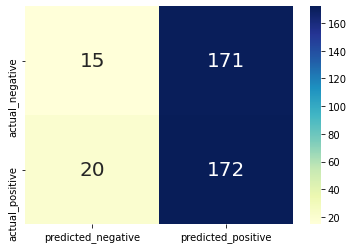

In [29]:
#bi-gram slightly better than uni-gram will continue more modeling with this feature

cm3 = conf_matrix(test_df['Label'], y_pred_cv2)

## Model 3 - TFIDF Vectorizer 

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
cv3_tfidf = TfidfVectorizer(stop_words='english', max_df=.70,preprocessor=prep)
X_train_cv3 = cv3_tfidf.fit_transform(cleaned_headlines_train)
X_test_cv3 = cv3_tfidf.transform(cleaned_headlines_test)

#pd.DataFrame(X_train_cv3.toarray(), columns=cv3_tfidf.get_feature_names())

In [32]:
rf_3 = RandomForestClassifier(criterion='entropy', n_estimators=200)
rf_3.fit(X_train_cv3, train_df['Label'])
y_pred_cv3 = rf_3.predict(X_test_cv3)

Accuracy: 0.468
Precision: 0.486
Recall: 0.802
F1: 0.605


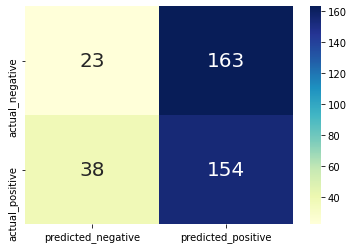

In [33]:


cm4 = conf_matrix(test_df['Label'], y_pred_cv3)

## Model 4 - Bi-gram countvectorizer with PCA

In [103]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [122]:
# We'v settled on RF and a bi-gram countvectorizer
# Now lets reduce dimensionality with PCA

from sklearn.decomposition import PCA

pca = PCA()

cv4 = CountVectorizer(ngram_range=(1,2), binary=True, stop_words='english', max_df=.70, preprocessor=prep)

X_train_cv4 = cv4.fit_transform(cleaned_headlines_train)
X_test_cv4 = cv4.transform(cleaned_headlines_test)

X_train_cv4_std = std.fit_transform(X_train_cv4.toarray())
X_test_cv4_std = std.transform(X_test_cv4.toarray())

X_train_pca = pca.fit_transform(X_train_cv4_std)
X_test_pca = pca.transform(X_test_cv4_std)
#pd.DataFrame(X_train_pca)

In [243]:
rf_4 = RandomForestClassifier(criterion='entropy', n_estimators=100)
rf_4.fit(X_train_pca, train_df['Label'])
y_pred_pca = rf_4.predict(X_test_pca)

Accuracy: 0.503
Precision: 0.508
Recall: 0.677
F1: 0.58


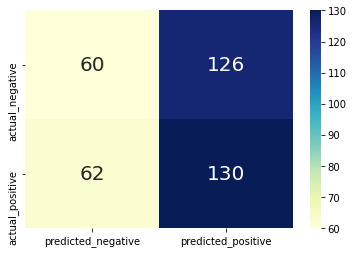

In [244]:
cm5 = conf_matrix(test_df['Label'], y_pred_pca)

In [41]:
import xgboost as xgb

In [42]:
gbm_1 = xgb.XGBClassifier( 
                        n_estimators=30000,
                        max_depth=3,
                        objective='binary:logistic', #new objective
                        learning_rate=.0001, 
                        subsample=.8,
                        min_child_weight=3,
                        colsample_bytree=.8,
                        scale_pos_weight = 7 
                       )

In [220]:
X_train_pca

array([[-1.17358703e-01, -8.24967151e-01, -8.87885752e-01, ...,
        -1.52235439e+00, -4.72223856e-01,  1.71230735e-13],
       [-4.73157947e-01, -6.54731022e-01, -5.73524572e-01, ...,
        -5.75458980e-01, -2.32270508e+00,  1.71230735e-13],
       [ 4.77448283e-01, -4.79525662e-01, -6.98546137e-01, ...,
         2.43364378e-01, -8.53636108e-01,  1.71230735e-13],
       ...,
       [-3.26519872e-01, -8.70932207e-01, -6.76487691e-01, ...,
        -9.08718946e-02, -5.12076385e-01,  1.71230735e-13],
       [-9.38117499e-01, -4.60737826e-01, -1.03080580e+00, ...,
         3.12091189e-02,  7.60631869e-02,  1.71230735e-13],
       [-1.11817404e-01, -1.80410733e-01, -1.04584687e+00, ...,
         3.72406661e-02, -1.75030731e-01,  1.71230735e-13]])

In [226]:
from sklearn.model_selection import train_test_split

In [227]:
X_train_xgb, X_val, y_train_xgb, y_val = train_test_split(X_train_pca, train_df['Label'], test_size =0.20, random_state = 42)

In [228]:
eval_set=[(X_train_xgb ,y_train_xgb),(X_val,y_val)]

In [233]:
gbm_1.fit(X_train_pca, train_df['Label'],eval_set=eval_set, eval_metric='error', early_stopping_rounds=10,verbose=True)

[0]	validation_0-error:0.44410	validation_1-error:0.41796
[1]	validation_0-error:0.45497	validation_1-error:0.43034
[2]	validation_0-error:0.45575	validation_1-error:0.43034
[3]	validation_0-error:0.46273	validation_1-error:0.43653
[4]	validation_0-error:0.46273	validation_1-error:0.43963
[5]	validation_0-error:0.46196	validation_1-error:0.43963
[6]	validation_0-error:0.46273	validation_1-error:0.43963
[7]	validation_0-error:0.46273	validation_1-error:0.43963
[8]	validation_0-error:0.46273	validation_1-error:0.43963
[9]	validation_0-error:0.46273	validation_1-error:0.43963
[10]	validation_0-error:0.46273	validation_1-error:0.43963


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.0001, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=30000, n_jobs=12, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=7,
              subsample=0.8, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [234]:
gbm_1.predict(X_test_pca)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Accuracy: 0.508
Precision: 0.508
Recall: 1.0
F1: 0.674


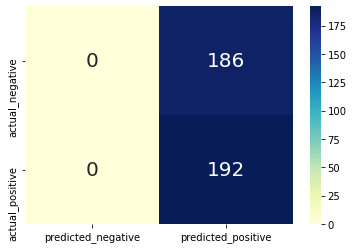

In [235]:
cm5_a = conf_matrix(test_df['Label'], gbm_1.predict(X_test_pca))

# Model 5 - N-gram TF-IDF Vectorizer with PCA

In [37]:
cv5_tfidf = TfidfVectorizer(stop_words='english', ngram_range=(2,2),max_df=.70,preprocessor=prep)
X_train_cv5 = cv5_tfidf.fit_transform(cleaned_headlines_train)
X_test_cv5 = cv5_tfidf.transform(cleaned_headlines_test)

In [38]:
pca_2 = PCA()
X_train_pca_2 = pca_2.fit_transform(X_train_cv5.toarray())
X_test_pca_2 = pca_2.transform(X_test_cv5.toarray())

In [39]:
rf_5 = RandomForestClassifier(criterion='entropy', n_estimators=100)
rf_5.fit(X_train_pca_2, train_df['Label'])
y_pred_pca_2 = rf_5.predict(X_test_pca_2)

Accuracy: 0.497
Precision: 0.505
Recall: 0.526
F1: 0.515


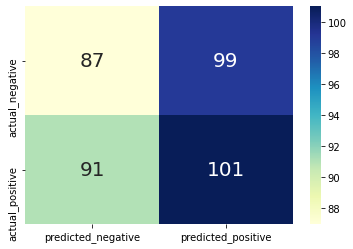

In [40]:
cm6 = conf_matrix(test_df['Label'], y_pred_pca_2)

# Topic Modeling

In [ ]:
nlp_df.set_index('Date')

In [ ]:
nlp_df

In [47]:
cleaned_headlines = cleaned_headlines_train + cleaned_headlines_test

In [48]:
len(cleaned_headlines)

1989

In [55]:
vectorizer = CountVectorizer(ngram_range=(1,2), binary=True, stop_words='english', preprocessor=prep)

In [86]:
doc_word = vectorizer.fit_transform(cleaned_headlines[0:3])

In [87]:
from sklearn.decomposition import NMF

In [88]:
nmf_model = NMF(3)
doc_topic = nmf_model.fit_transform(doc_word)

/Users/rahulraju/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [89]:
doc_word.shape

(3, 917)

In [90]:
topic_word = pd.DataFrame(nmf_model.components_.round(3),
             index = ["component_1","component_2", 'compenent_3'],
             columns = vectorizer.get_feature_names())
topic_word

,abandoned,abandoned russia,abhinav,abhinav bindra,absorb,absorb georgia,accuses,accuses making,act,act prevent,...,xo,xo laptop,year,year old,years,years kept,youtube,youtube russian,zealand,zealand passports
component_1,0.000,0.000,0.000,0.000,0.26,0.26,0.000,0.000,0.26,0.26,...,0.000,0.000,0.260,0.260,0.26,0.26,0.26,0.26,0.000,0.000
component_2,0.000,0.000,0.000,0.000,0.00,0.00,0.216,0.216,0.00,0.00,...,0.216,0.216,0.216,0.216,0.00,0.00,0.00,0.00,0.000,0.000
compenent_3,0.235,0.235,0.235,0.235,0.00,0.00,0.000,0.000,0.00,0.00,...,0.000,0.000,0.000,0.000,0.00,0.00,0.00,0.00,0.235,0.235


In [91]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [92]:
display_topics(nmf_model, vectorizer.get_feature_names(), 10)


Topic  0
world, new, opening, ossetia, south ossetia, south, iraq, nato, did, military

Topic  1
ceasefire georgia, cnn, georgia operation, cold war, right, right gorbachev, cold, cnn use, rocket, rocket launchers

Topic  2
zealand passports, mistake, leaders genocide, zealand, living, living ossetia, manufacturer, manufacturer war, medal, medal india


## Latent Semantic Analysis(LSA)

In [93]:
from sklearn.decomposition import TruncatedSVD

In [94]:
lsa = TruncatedSVD(3)

doc_topic_lsa = lsa.fit_transform(doc_word)
lsa.explained_variance_ratio_

array([0.10840799, 0.49337014, 0.39822186])

In [95]:
topic_word_lsa = pd.DataFrame(lsa.components_.round(3),
             index = ["component_1","component_2", "component_3"],
             columns = vectorizer.get_feature_names())
topic_word_lsa

,abandoned,abandoned russia,abhinav,abhinav bindra,absorb,absorb georgia,accuses,accuses making,act,act prevent,...,xo,xo laptop,year,year old,years,years kept,youtube,youtube russian,zealand,zealand passports
component_1,0.013,0.013,0.013,0.013,0.041,0.041,0.025,0.025,0.041,0.041,...,0.025,0.025,0.066,0.066,0.041,0.041,0.041,0.041,0.013,0.013
component_2,0.003,0.003,0.003,0.003,-0.030,-0.030,0.048,0.048,-0.030,-0.030,...,0.048,0.048,0.018,0.018,-0.030,-0.030,-0.030,-0.030,0.003,0.003
component_3,0.059,0.059,0.059,0.059,-0.012,-0.012,-0.011,-0.011,-0.012,-0.012,...,-0.011,-0.011,-0.023,-0.023,-0.012,-0.012,-0.012,-0.012,0.059,0.059


In [96]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [97]:
display_topics(lsa, vectorizer.get_feature_names(), 5)


Topic  0
georgia, new, iraq, nato, russia

Topic  1
conflict, georgia russia, america, pyramid tokyo, cover georgian

Topic  2
abandoned russia, abhinav, zealand passports, mistake monumental, zealand


In [217]:
def get_news(start_date, end_date, num_topics, num_topic_words):
    
    selected_date_headlines = nlp_df.loc[start_date:end_date,:]
   
    news_list= []

    for row in range(0,len(selected_date_headlines)):
        news_list.append(' '.join(str(txt) for txt in selected_date_headlines.iloc[row, 1:26]))
    
    cleaned_selected_headlines = []

    for text in range(0, len(selected_date_headlines)):
        cleaned_selected_headlines.append(re.sub('b[''\'"]', '', news_list[text])) # remove 'b' followed by characters
        cleaned_selected_headlines[text] = re.sub("\'", '', cleaned_selected_headlines[text]) # remove quotes and '\'
        cleaned_selected_headlines[text] = re.sub('\w*\d\w*', ' ', cleaned_selected_headlines[text])# remove digits
        cleaned_selected_headlines[text] = cleaned_selected_headlines[text].lower() # make all text lower case
        cleaned_selected_headlines[text] = re.sub('[%s]'% re.escape(string.punctuation), ' ', cleaned_selected_headlines[text]) #remove punctuation

    selected_date_vectorizer = CountVectorizer(ngram_range=(1,2), binary=True, stop_words='english', preprocessor=prep)    
    
    selected_doc_word = selected_date_vectorizer.fit_transform(cleaned_selected_headlines)
    
    
    lsa_selected = TruncatedSVD(num_topics)

    doc_topic_lsa = lsa_selected.fit_transform(selected_doc_word)   
    
    return display_topics(lsa_selected, selected_date_vectorizer.get_feature_names(), num_topic_words)

In [278]:
get_news('2008-08-08','2008-09-31',2, 9)


Topic  0
russia, war, russian, says, georgia, military, china, world, attack

Topic  1
pakistan, chiefs, open, killing, raid, kills, civilians, million, militants


In [203]:
lsa_selected = TruncatedSVD(3)

doc_topic_lsa = lsa_selected.fit_transform(selected_doc_word)

In [205]:
display_topics(lsa_selected, selected_date_vectorizer.get_feature_names(), 8)


Topic  0
islamic, state, islamic state, saudi, countrys, isis, eu, terror

Topic  1
executive, sony, disabled, site god, slave, slave centre, hedge, hedge fund

Topic  2
thousands, states, recovery, fighting, erdogan, officers, young, offers
